### Fake News Detection using NLP

#### Importing libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

#### Loading the datasets

In [36]:
fake = pd.read_csv(r'C:\Users\USER\Downloads\Spec\Fatima Fellowship\Coding Challenge\Fake.csv')

In [37]:
true = pd.read_csv(r"C:\Users\USER\Downloads\Spec\Fatima Fellowship\Coding Challenge\True.csv")

In [38]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [39]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [40]:
fake['label'] = 'fake'
true['label'] = 'true'

In [43]:
combined = pd.concat([fake, true], axis=0).reset_index(drop=True)

In [46]:
combined.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#### Some data cleaning and analysis

In [33]:
from sklearn.utils import shuffle
combined = shuffle(combined)

In [50]:
combined.drop(['title', 'date'], axis=1, inplace=True)

In [51]:
#converting all strings to lower case
combined['text'] = combined['text'].apply(lambda x : x.lower())
combined.head()

,text,subject,label
0,donald trump just couldn t wish all americans ...,News,fake
1,house intelligence committee chairman devin nu...,News,fake
2,"on friday, it was revealed that former milwauk...",News,fake
3,"on christmas day, donald trump announced that ...",News,fake
4,pope francis used his annual christmas day mes...,News,fake


In [67]:
def characters (text) :
    text = [char for char in text if char not in string.punctuation]
    clean = ''.join(text)
    return clean

In [68]:
combined['text'] = combined['text'].apply(characters)

In [69]:
combined

,text,subject,label
0,donald trump just couldn t wish all americans ...,News,fake
1,house intelligence committee chairman devin nu...,News,fake
2,on friday it was revealed that former milwauke...,News,fake
3,on christmas day donald trump announced that h...,News,fake
4,pope francis used his annual christmas day mes...,News,fake
...,...,...,...
44893,brussels reuters nato allies on tuesday welco...,worldnews,true
44894,london reuters lexisnexis a provider of legal...,worldnews,true
44895,minsk reuters in the shadow of disused soviet...,worldnews,true
44896,moscow reuters vatican secretary of state car...,worldnews,true


In [77]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
len(stop_words)

179

In [80]:
combined['text'] =  combined['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))

In [101]:
Label  = combined.groupby('label')['text'].count()
print(Label)

label
fake    23481
true    21417
Name: text, dtype: int64


<AxesSubplot:xlabel='label'>

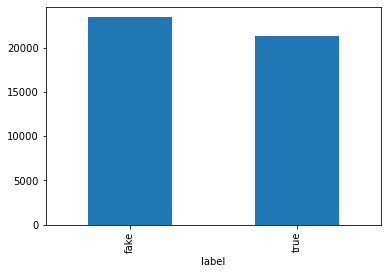

In [104]:
Label.plot(kind='bar')

In [103]:
Subject = combined.groupby('subject')['text'].count()
print(Subject)

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<AxesSubplot:xlabel='subject'>

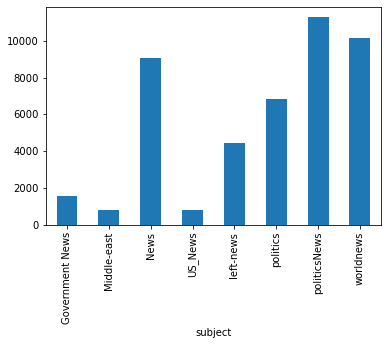

In [114]:
Subject.plot(kind='bar')

In [117]:
from wordcloud import WordCloud

(-0.5, 499.5, 499.5, -0.5)

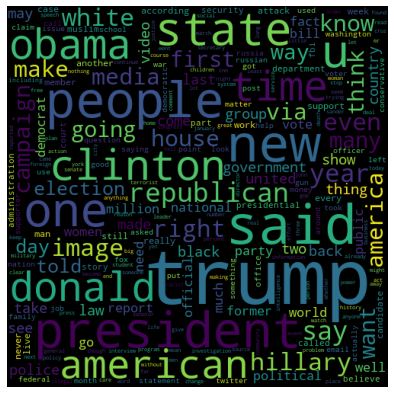

In [142]:
fake_labels = combined[combined['label'] == 'fake']
fake_words = ' '.join([text for text in fake_labels.text])
fake_cloud = WordCloud(width=500, height=500, max_words=250, max_font_size=100, collocations = False).generate(fake_words)
plt.figure(figsize=(10, 7))
plt.imshow(fake_cloud)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

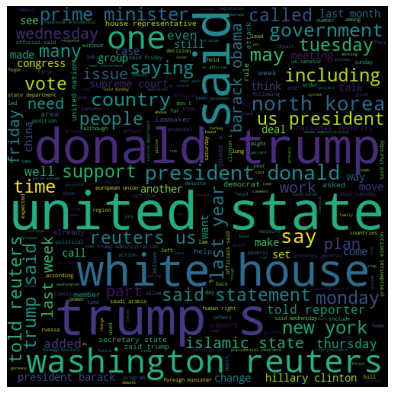

In [137]:
true_labels = combined[combined['label'] == 'true']
true_words = ' '.join([text for text in true_labels.text])
true_cloud = WordCloud(width=500, height=500, max_words=250, max_font_size=100).generate(true_words)
plt.figure(figsize=(10, 7))
plt.imshow(true_cloud)
plt.axis('off')

In [143]:
from nltk import tokenize
spaces = tokenize.WhitespaceTokenizer()

#### Model training and evaluation

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(combined['text'], combined.label, test_size = 0.2, random_state = 101)

In [242]:
X_train.head()

23210    paul crag robertsa month ago wrote column hesi...
6458     first said wages high said work raise minimum ...
3180     donald trump attacked american car company got...
9389     houston texas trial lawyer democrat megadonor ...
28041    reuters north carolina thursday repealed law r...
Name: text, dtype: object

In [243]:
y_train.head()

23210    fake
6458     fake
3180     fake
9389     fake
28041    true
Name: label, dtype: object

In [244]:
print(X_train.shape)
print(y_train.shape)

(35918,)
(35918,)


In [260]:
#We will use Decision Tree Classifier

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [246]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), 
                 ('model', DecisionTreeClassifier(criterion= 'entropy', max_depth = 20,
                                                  splitter='best', random_state=101))])

In [247]:
model = pipe.fit(X_train, y_train)

In [248]:
pred = model.predict(X_test)

In [249]:
print("Classifier Accuracy Score: {}%".format(round(accuracy_score(y_test, pred)*100,2)))

Classifier Accuracy Score: 99.76%
